In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pickle
import math

In [3]:
with open("C:\\Users\\Lenovo\\Desktop\\nnfs_dataset\\dataset.pkl", 'rb') as f:
    data= np.array(pickle.load(f)['data'])
    data=data.reshape(data.shape[0], 784)
    print(data.shape)
    data=pd.DataFrame(data)
with open("C:\\Users\\Lenovo\\Desktop\\nnfs_dataset\\dataset.pkl", 'rb') as f:
    labels=np.array(pickle.load(f)['labels'])
with open("C:\\Users\\Lenovo\\Desktop\\nnfs_dataset\\dataset.pkl", 'rb') as f:
   

    data['labels']=labels
    data=np.array(data)
    print(data.shape)
    

    

(60000, 784)
(60000, 785)


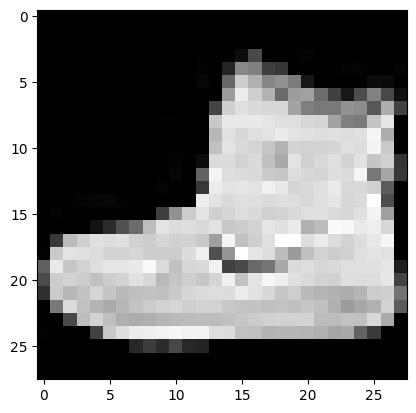

In [4]:

#visualizing data
plt.imshow(data[0][:784].reshape(28, 28), cmap='gray')


In [39]:
#splitting the data into training and testing sets
np.random.shuffle(data)
data_train_set=data[0:40000].T
data_train=data_train_set[0:784]
data_labels=data_train_set[784].reshape(1,-1)

data_test_set=data[40000:60000].T
data_test=data_test_set[0:784]
data_labels_test=data_test_set[784].reshape(1,-1)


label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']
print(data_train.shape)
print(data_labels.shape)



(784, 40000)
(1, 40000)


In [40]:
def init_params():
    W1=np.random.randn(10, 784) * 0.01
    b1=np.random.randn(10,1)
    W2=np.random.randn(10,10) * 0.01
    b2=np.random.randn(10,1)
    return W1, b1, W2, b2

def tanh(Z):
    return np.tanh(Z)
    
def softmax(Z):
    return np.exp(Z)/np.sum(np.exp(Z), axis = 0)

def forward_prop(W1, b1, W2, b2, X):
    Z1=np.dot(W1,X)+b1
    A1=tanh(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot_encode(labels):
    labels=labels.T
    labels_one_hot=np.zeros((labels.shape[0], 10))
    for i in range(labels.shape[0]):
        labels_one_hot[i, labels[i]]=1
    return labels_one_hot.T
    
    

    

def diff_tanh(Z):
    return 1-np.square(tanh(Z))

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    m=Y.size
    one_hot_Y=one_hot_encode(Y)

    dZ2=A2-one_hot_Y
    dW2=(1/m)*np.dot(dZ2, A1.T)
    db2=(1/m)*np.sum(dZ2, axis=1, keepdims=True)

    dZ1=np.dot(W2.T,dZ2)*diff_tanh(Z1)
    dW1=(1/m)*np.dot(dZ1, X.T)
    db1=(1/m)*np.sum(dZ1, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

    
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1-=alpha*dW1
    b1-=alpha*db1
    W2-=alpha*dW2
    b2-=alpha*db2
    return W1,b1, W2, b2



In [41]:
def get_predictions(A2):
    return np.argmax(A2,0)
    
def get_accuracy(predictions, Y):
    #print(predictions, Y)
    return np.sum(predictions ==Y)/Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1,W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2= forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2=back_prop(Z1, A1, Z2, A2, W2, X, Y)
       
        
        W1, b1,W2, b2=update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if (i%10==0):
            print('iteration:', i)
            print('accuracy', get_accuracy(get_predictions(A2), Y))
    
            
    return W1, b1, W2, b2

        




In [42]:
W1, b1, W2, b2=gradient_descent(data_train,data_labels, 1000, 0.01)

iteration: 0
accuracy 0.1002
iteration: 10
accuracy 0.1002
iteration: 20
accuracy 0.1002
iteration: 30
accuracy 0.11725
iteration: 40
accuracy 0.163475
iteration: 50
accuracy 0.187675
iteration: 60
accuracy 0.192475
iteration: 70
accuracy 0.27355
iteration: 80
accuracy 0.28715
iteration: 90
accuracy 0.298475
iteration: 100
accuracy 0.344475
iteration: 110
accuracy 0.374075
iteration: 120
accuracy 0.3797
iteration: 130
accuracy 0.378575
iteration: 140
accuracy 0.374275
iteration: 150
accuracy 0.387975
iteration: 160
accuracy 0.377675
iteration: 170
accuracy 0.38805
iteration: 180
accuracy 0.378575
iteration: 190
accuracy 0.393625
iteration: 200
accuracy 0.39075
iteration: 210
accuracy 0.3964
iteration: 220
accuracy 0.3983
iteration: 230
accuracy 0.3969
iteration: 240
accuracy 0.483075
iteration: 250
accuracy 0.6239
iteration: 260
accuracy 0.62495
iteration: 270
accuracy 0.631275
iteration: 280
accuracy 0.689925
iteration: 290
accuracy 0.685075
iteration: 300
accuracy 0.6488
iteration: 3

In [43]:
#performing forward propogation on testing data
Z1, A1, Z2, A2= forward_prop(W1, b1, W2, b2, data_test)
final_predictions=get_predictions(A2)
print(get_accuracy(final_predictions, data_labels_test))



0.7702


label: [1]
prediction: 1 Trouser
label: [8]
prediction: 8 Bag
label: [6]
prediction: 2 Pullover
label: [8]
prediction: 8 Bag
label: [1]
prediction: 1 Trouser
label: [4]
prediction: 4 Coat


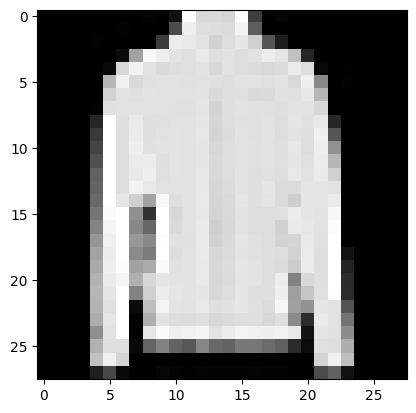

In [44]:
label_names_dict = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle Boots'
}


for i in range(1,7):
    print("label:", data_labels_test.T[i])
    plt.imshow(data_test.T[i].reshape(28, 28), cmap='gray')



    print('prediction:', final_predictions[i], label_names[final_predictions[i]])
    


